# Aircraft Noise Pollution in Downtown San Diego

#### Introduction

In recent years, the amount of air traffic has skyrocketed for the San Diego International Airport. The number of commerical flights has continued to grow, reaching a peak of 20.1 million annual flights in 2015. According to both ABC News and Wikipedia, San Diego has officially become the busiest single-runway airport in the United States. Couple this with the extremely short runway in comparison to other busy International Airports and you have flights that begin to descend with extreme proximity to the habiting community every couple minutes. It has even gotten so bad that in certain places vocal communication has stalls for about 10 seconds every few minutes. In addition, apartments have to be specially designed with soundproof walls. So, this got us thinking. Can this amount of high frequency noise be detrimental to human hearing?

#### Research Question

Is it safe to live in downtown San Diego with the noise pollution due to high frequency of close landing airplanes? Have noise complaints about San Diego International Airport increased at a higher rate than for other airports in recent years?

#### Hypothesis

Due to the high frequency of airplane arrivals (in part due to the international status of SAN) as well as the relatively short distance between the planes and noise-affecting locations of densely populated areas, we hypothesis that it is unsafe to be expose civilians to such high amounts of raw noise pollution. We also predict that due to that rapid increases in air traffic, San Diego International Airport noise complaints have increased at a higher than average rate.

### Step 1 - Flight Growth Predictions 

#### Step 1a - Cleaning the Operations Data 

In [1]:
# imports to help data visualization
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import seaborn as sns; sns.set(color_codes=True)

# imports to help scraping
import PyPDF2 as ppdf
import string as s

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# creating a pdf file object
pdfFileObj = open('Historical_Data.pdf', 'rb')

# creating a pdf reader object
pdfReader = ppdf.PdfFileReader(pdfFileObj)

We will now open the Historical Data pdf. This is because this pdf, contains the historical operations count and change per year. Operations is defined as any arrival or departure from the airport. Though this data is unfortunately saved as a pdf, we will have to extract it using PyPDF2. Wish me good luck!

In [3]:
# creating a page object
pageObj = pdfReader.getPage(0)

In [4]:
# extracting and cleaning text from page
contents = pageObj.extractText()

# inserts needed lines
contents = contents.replace("%", "%\n")
year = 1949
i = 0
#conversion to integer years
while year+i <= 2015:
    contents = contents.replace(str(year+i), str(year+i) + "\n")
    i += 1
# removing unnecessary print lines and unnecessary values.
contents_array = contents.split("\n")
contents_array = contents_array[15:]
contents_array = contents_array[:len(contents_array)-8]
for i in range(0,len(contents_array)):
    contents_array[i] = contents_array[i].strip()
contents_array[:] = [x for x in contents_array if x != '']

In [5]:
# create arrays for individual informations
year=[]
enplaned_d=[]
deplaned_d=[]
total_d=[]
enplaned_i=[]
deplaned_i=[]
total_i=[]
enplaned_a=[]
deplaned_a=[]
total_a=[]
change=[]
source=[]

In [6]:
# aggregate data accordingly
i = 0
for item in contents_array:
    index = i % 12
    if(item == '-'):
        item = np.nan
    if(index == 0):
        year.append(item)
    if(index == 1):
        enplaned_d.append(item)
    if(index == 2):
        deplaned_d.append(item)
    if(index == 3):
        total_d.append(item)
    if(index == 4):
        enplaned_i.append(item)
    if(index == 5):
        deplaned_i.append(item)
    if(index == 6):
        total_i.append(item)
    if(index == 7):
        enplaned_a.append(item)
    if(index == 8):
        deplaned_a.append(item)
    if(index == 9):
        total_a.append(item)
    if(index == 10):
        change.append(item)
    if(index == 11):
        source.append(item)
    i += 1
change.append(np.nan)
source.append(np.nan)

In [7]:
# create dataframe to extract information
raw_data = {"Year": year, "Enplaned (Domestic)": enplaned_d, "Deplaned (Domestic)": deplaned_d, 
              "Total (Domestic)": total_d, "Enplaned (International)": enplaned_i, 
              "Deplaned (International)": deplaned_i, "Total (International)": total_i, 
              "Enplaned (All)": enplaned_a, "Deplaned (All)": deplaned_a, "Total (All)": total_a, 
              "Change": change, "Source": source}
data = pd.DataFrame(data=raw_data)

We have now extracted and cleaned the data, let's quickly print it out to make sure it looks right.

In [8]:
# checking to make sure data looks right
data

,Change,Deplaned (All),Deplaned (Domestic),Deplaned (International),Enplaned (All),Enplaned (Domestic),Enplaned (International),Source,Total (All),Total (Domestic),Total (International),Year
0,0.0%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"139,327",NaN,NaN,1949
1,38.8%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"193,373",NaN,NaN,1950
2,66.1%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"321,189",NaN,NaN,1951
3,21.6%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"390,427",NaN,NaN,1952
4,3.1%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"402,674",NaN,NaN,1953
5,5.9%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"426,600",NaN,NaN,1954
6,16.4%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"496,641",NaN,NaN,1955
7,17.2%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"582,120",NaN,NaN,1956
8,17.3%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"682,609",NaN,NaN,1957
9,2.3%,NaN,NaN,NaN,NaN,NaN,NaN,Historical Records for the Airport,"698,543",NaN,NaN,1958


In [9]:
data.to_csv("operations_over_time.csv")

In [10]:
# closing the pdf file object
pdfFileObj.close()

Now that we have our data, we will visualize it to help ease our understanding. Having the total number of operations will help us understand airport growth, air traffic and noise pollution.

#### Step 1b - Visualizing the Data

In [11]:
# create larger images
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [12]:
df = pd.read_csv("operations_over_time.csv")

In [13]:
# conversion function
def toInt(string):
    string = string.replace("%","")
    string = string.replace(",","")
    try:
        return int(string)
    except ValueError:
        return float(string)

In [14]:
# copy separate columns
df_year = np.asarray(df['Year'][:len(df['Year'])-1].apply(toInt))
df_operations = np.asarray(df['Total (All)'][:len(df['Year'])-1].apply(toInt))
df_change = np.asarray(df['Change'][:len(df['Year'])-1].apply(toInt))

In [15]:
data1 = pd.DataFrame({'Year':df_operations, 'Total Number of Operations':df_year})
data1.columns=['Year', 'Total Number of Operations\n(times 10,000,000)']

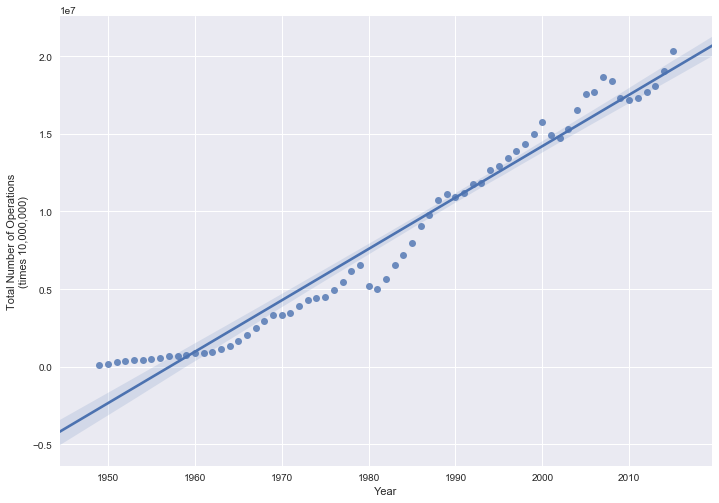

In [16]:
# plot operations over time
ax = sns.regplot(x='Year', y='Total Number of Operations\n(times 10,000,000)', data=data1)
fig1 = ax.get_figure()

The data shows here that amount of operations has only been increasing each and every year, expecially skyrocketing within the last few years.

In [17]:
data2 = pd.DataFrame({'Year':df_change, 
    'Change':df_year})
data2.columns=['Year', 'Change in Operations\n(as percentages)']

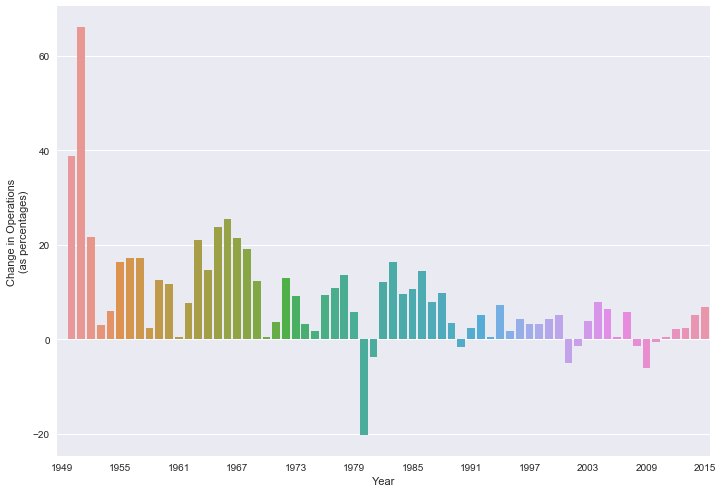

In [18]:
ax = sns.barplot(x='Year', y='Change in Operations\n(as percentages)', data=data2)
labels = ax.get_xticklabels()
for i,l in enumerate(labels):
    if(i%6 != 0): labels[i] = ''
    ax.set_xticklabels(labels)
fig2 = ax.get_figure()

The data shows that every year (with a few exception) has had a substantial increase in operations per year. The most has clearly ocurred at the opening of the aiport. In recent years since 2011, the airport has continued to grow more and more each year to the 2015 record amount.

#### Step 1c - Extrapolation

In [19]:
a1, b1 = np.polyfit(df_year, df_operations, 1)
print("y = ", a1, "x + ", b1)

y =  330881.776678 x +  -647561384.346


In [20]:
val_2018 = a1 * 2018 + b1
print(val_2018)

20158040.9903


Here, we are able to predict for the future based on our data. For 2018, our data suggests that there will be a whopping 20.1 million flights for the year, which is similar to the 2015 record amounts. The traffic is only getting worse and we will see how this relates to the number of complaints that San Diego will recieve because of noise pollution.

### Step 2 - Noise Complaint Analysis

#### Step 2a - Cleaning the Noise Complaint Data

We can directly access the Aircraft Noise Complaint csv file from government's website. https://catalog.data.gov/dataset/aircraft-noise-complaint-data

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Aircraft_Complaint_Data.csv')
#We don't need the number of callers. Just look at the numbers of complaints in different areas of America.
df = df.drop(['Total Number of Callers'], axis=1)

Note: Interestingly, the csv file uploaded by government includes data of 2018 December but lacks of 2017 December. We think this might be a typo error, thus change the 2018 December to 2017 December.

In [3]:
df = df.replace(to_replace=2018,value=2017)
df = df[df['Year'] > 2009]

Note: Many cities are only recorded under 10 times for 7 years, which is not qualifilable to compare with San Digeo Airpot. Thus we only choose the most 20 recorded cities into graph.

In [4]:
check_list = df['Community'].value_counts().head(n=20)
check_list = check_list.index.tolist()
#check_list store the name of those cities

We want to do a year comparision of noise complaint between cities and San Diego Airport. We do not take a month or quarter comparison because time is too limited to show a tendency, which is unstable compared to year level. Time interval of one year is the most appropriate.

In [5]:
#Add whole year's noise complaints to a single cell
def sumYear(check):
    #extract information about this checked city
    lt = df[df['Community'] == check]
    #sum up one year noise of complaint
    years = lt['Year'].value_counts().index.tolist()
    result = pd.DataFrame({'Community':[check]})
    count = 0;
    for i in years:
        complaints = 0
        yr = lt[lt['Year'] == i]
        #print(yr)
        #iterate through all years recorded this checked city
        #some months or years are missing, use average complaints to replace
        months = yr['Month'].value_counts().index.tolist()
        mt = yr.set_index('Month')
        mt = mt.drop(['Community'],axis=1)
        #print(mt)
        for j in months:
            #index start with 0
            answer = mt.loc[j]['Total Complaints']
            complaints = complaints + answer
        
        if len(months) < 12:
            average = complaints/len(months)
            dif = 12 - len(months)
            complaints = complaints + dif*average
        #comaplints is the sum of this year for checked city
        count = count + 1        
        result[str(i)] = complaints
        
    return result

Process the csv file into a plot friendly csv that city names as row label and year as column labels.

In [6]:
final_complaints = pd.DataFrame(columns=['Community','2010','2011','2012','2013','2014','2015','2016','2017'])
#iterately process the sample 20 cities from csv
for i in range(20):
    final_complaints = final_complaints.append(sumYear(check_list[i]))

We extract the number of noise complaints directly from San Diego Airport's noise report 2016 Q1. It contains a summary of past years of noise complaints. For 2017, Q2's report about the number is weirdly missing in pdf file, and Q1 received 8229 complaints and Q3 received 26227 complaints from 230 households. Since Q2 has record "received complaitns from 183 households", we can approximately use average to fill in Q2 and Q4's data. Thus for 2017, there are possibly (8229+26227)*2 = 68912 complaints.

In [7]:
SDAirport = pd.DataFrame({'Community':['San Diego'],'2010':[274],'2011':[203],'2012':[232],'2013':[172],
                         '2014':[156],'2015':[3926],'2016':[31624],'2017':[68912]})
sd_num = [274,203,232,172,156,3926,31624,68912]
#add SD airport complaints into sample 
final_complaints = final_complaints.append(SDAirport)

cities = final_complaints['Community'].value_counts().index.tolist()
final_complaints = final_complaints.set_index('Community')

In [8]:
#take a look at data
final_complaints

,2010,2011,2012,2013,2014,2015,2016,2017
Community,,,,,,,,
San Francisco,650.000000,144.000000,426.000000,363.000000,229.000000,5997.000000,64201.000000,43450.000000
Pacifica,549.000000,580.000000,598.000000,338.000000,1015.000000,6030.000000,75423.000000,86095.000000
Daly City,1495.000000,1778.000000,1819.000000,1292.000000,1333.000000,5469.000000,33879.000000,25069.000000
Brisbane,5150.000000,5319.000000,3630.000000,5324.000000,9268.000000,20325.000000,60856.000000,44056.000000
San Bruno,44.727273,51.600000,88.000000,40.800000,58.909091,34.909091,158.000000,3222.000000
Foster City,282.545455,74.000000,34.666667,322.800000,100.363636,168.000000,8355.000000,7418.000000
Portola Valley,180.000000,52.000000,150.545455,152.000000,1376.000000,76194.000000,107589.000000,89244.000000
Palo Alto,136.800000,541.500000,315.600000,331.200000,632.727273,107909.000000,863149.000000,610940.000000
Millbrae,40.800000,39.600000,27.000000,44.400000,101.454545,87.000000,102.545455,587.000000


#### Step 2b - Visualizing the complaint data

We apply log transformation into the noise complaints data, because we are looking for an increasing tendency of complaints among cities for years but not the exact value. Without the log, we are unable to see clearly the increasing tendency, for there are some cities with extremely large amount of complaints, such as Oakland.

In [9]:
graph_log = plt.figure(figsize=(22,16))
#add text to graph_log
plt.title('Noise Complaint Line Graph', fontsize = 24, fontweight = 'bold')
plt.xlabel('Years from 2015 to 2017', fontsize = 20,fontweight = 'bold')
plt.ylabel('Number of Noise Complaints',fontsize = 20,fontweight = 'bold')

#some cities are not recorded in several years, leave them as missing point in graph
for i in range(len(cities)):
    city = final_complaints.loc[cities[i]]
    #city is the complaint data for years
    #for some cities exceed too much than others
    city = np.log10(city.tolist())
    time = ['2010','2011','2012','2013','2014','2015','2016','2017']
    #year is x label, complaints is y label
    plt.plot(time,city,label=cities[i])

plt.legend(fontsize = 'xx-large',bbox_to_anchor=(0.05,1.15))
size = plt.rcParams['figure.figsize']
size[0] = 16
size[1] = 13
plt.rcParams['figure.figsize'] = size

plt.close()

We also construct a bar graph for San Diego Airport record of noise compliant from 2010 to 2017. By annotating on the top of each bar, we can clearly see the sharp increment starting in 2015

In [10]:
graph_bar = plt.figure(figsize = (18,15))
#city = final_complaints.loc['San Diego']
time = [2010,2011,2012,2013,2014,2015,2016,2017]
plt.title('San Diego Airport Noise Complaints', fontsize = 22,fontweight = 'bold')
plt.bar(x = time, height = sd_num,width=0.35,label = 'San Diego',align= 'center')
plt.ylabel('Number of Noise Complaints',fontsize = 18,fontweight='bold')
plt.legend(loc='upper left')
#annotating
plt.text(x=2009.9,y=500,s='274',fontsize=18)
plt.text(x=2010.9,y=430,s='203',fontsize=18)
plt.text(x=2011.9,y=460,s='232',fontsize=18)
plt.text(x=2012.9,y=400,s='172',fontsize=18)
plt.text(x=2013.8,y=380,s='156',fontsize=18)
plt.text(x=2014.8,y=4160,s='3926',fontsize=18)
plt.text(x=2015.8,y=31870,s='31624',fontsize=18)
plt.text(x=2016.8,y=69050,s='68912',fontsize=18)

plt.close()

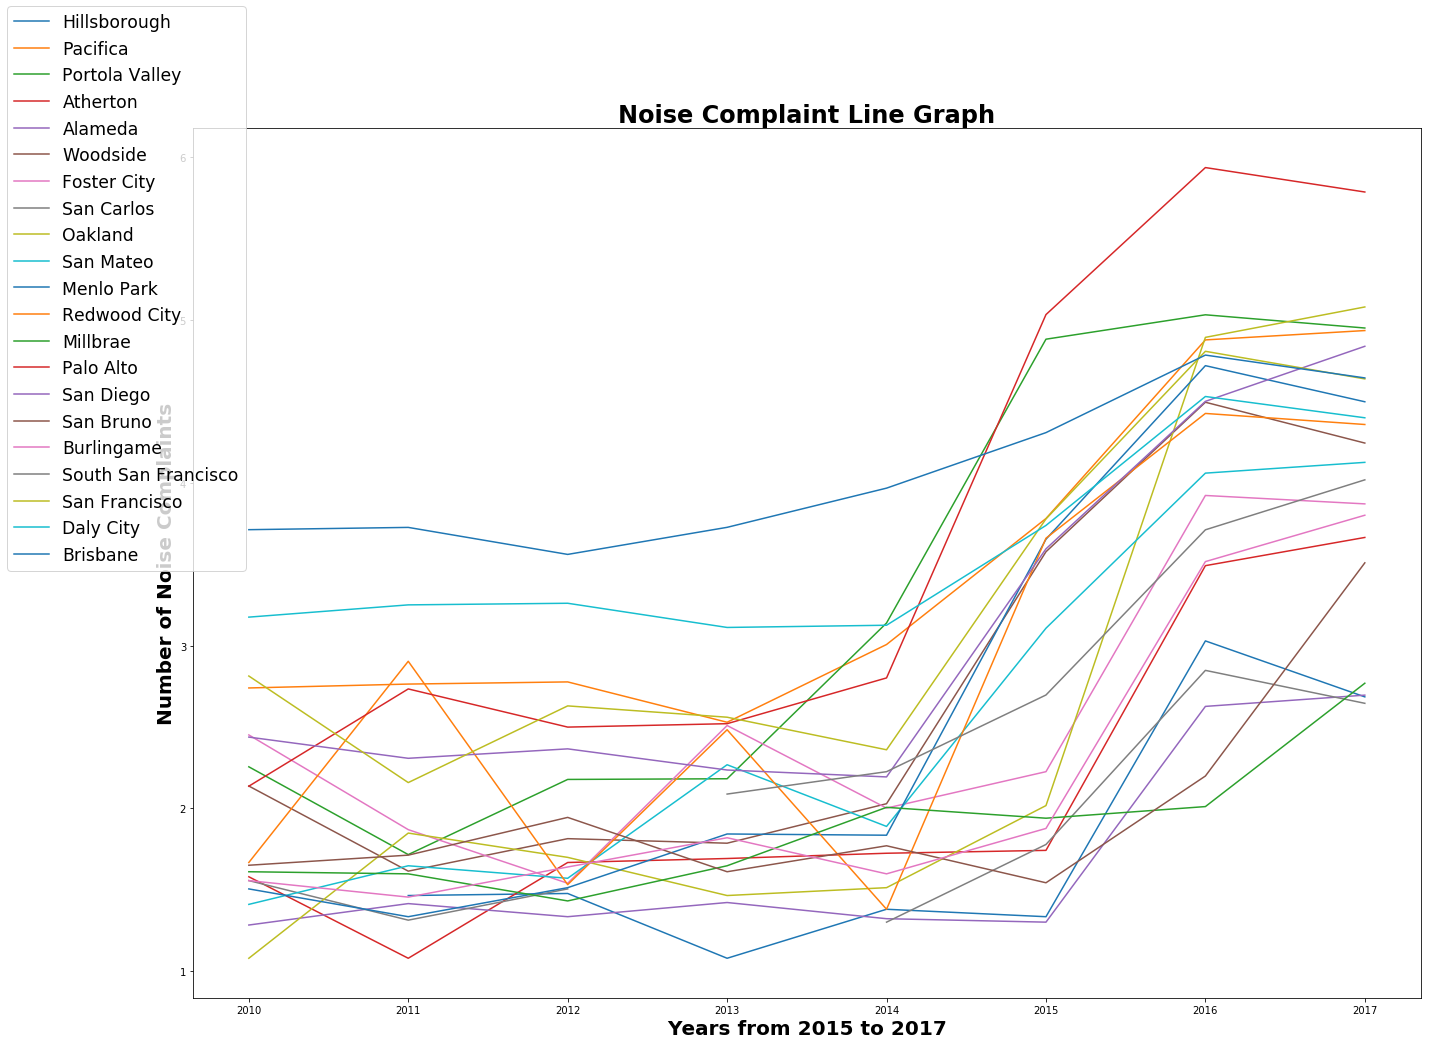

In [11]:
#check the graph_log
graph_log

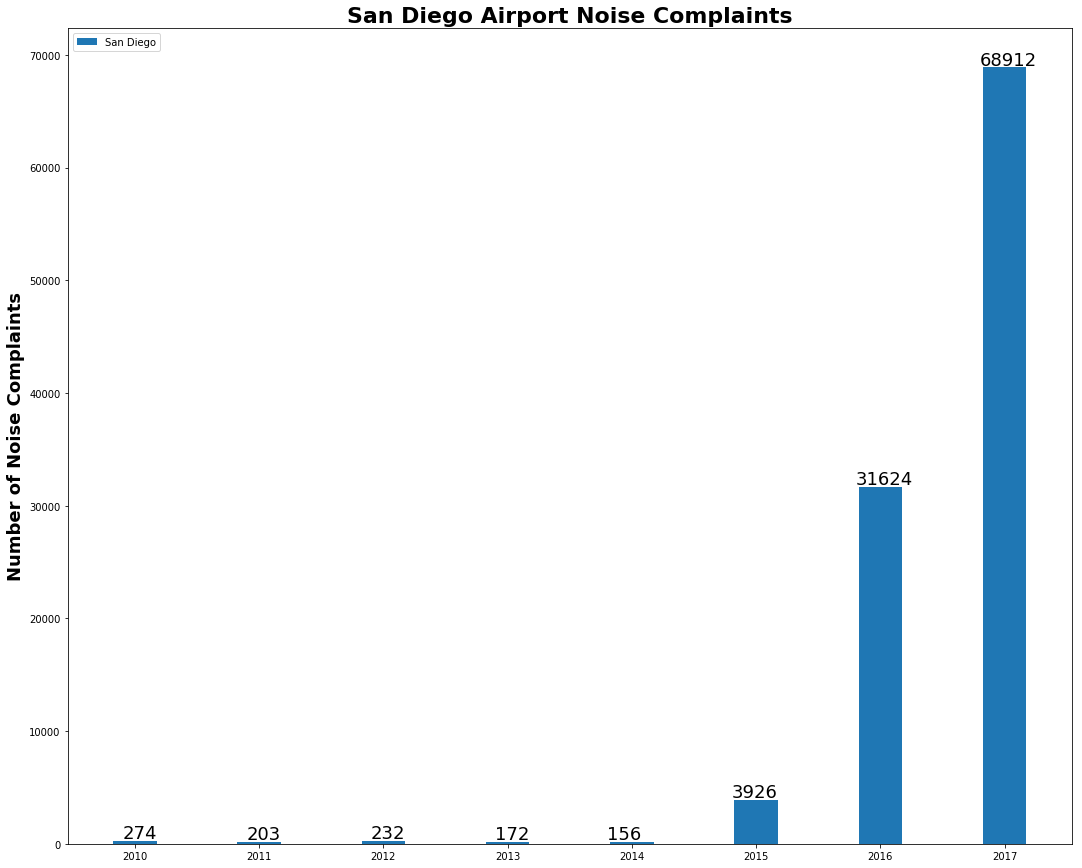

In [12]:
#check the graph_bar
graph_bar

In [13]:
#output them to jpg files
graph_log.savefig('Noise Complaint Line Graph.jpg')
graph_bar.savefig('San Diego Airport Bar Graph.jpg')

#### Step 2c - Discussion

By reading the graph_log picture, we see noise complaints sharply increased since 2014 for our top 20 cities chosen and SD airport. Meanwhile, the increasing nearly never stop for the 7 years. Combined the sample with SD airport, we are unable to ignore the more and more noise complaints for airport throughout this country. This increasing tendency matches our step 1 research result that operations of flights in airport are increasing. Reasonably, more and more people are effected by the noise and more and more people cannot bear the noise any more. But one question remains that why for most city, noise complaint suddenly multiplied for times from 2014 to 2015.

### Step 3 - Airport Noise Estimation

We plan to estimate the amount of noise heard in decibels from a single flight at the airport for different regions in San Diego.

In [32]:
% config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import PyPDF2 as pdf
import math
import matplotlib.pyplot as plt
import random

import folium
# pip install folium
# https://folium.readthedocs.io/en/latest

from haversine import haversine
# pip install haversine
# https://pypi.python.org/pypi/haversine

import requests
import geocoder
import shapefile

import shapely
# pip install shapely
# Alternatively:
# conda install -c scitools shapely
# https://pypi.python.org/pypi/Shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set(style='whitegrid', context ='paper')

### Part 3a: Data description

#### Part 3a(i):

We must obtain the CNEL (Community Noise Equivalent Level) data recorded by the RMTs (Remote Noise Monitoring Terminals) that the San Diego Airport uses to record noise from the airport. CNEL is "is the average sound level over a 24 hour period, with a penalty of 5 dB added for the evening hours or 19:00 to 22:00, and a penalty of 10 dB added for the nighttime hours of 22:00 to 07:00" (1). Although we will not be estimating CNEL, this will be used to compare our estimations against an accurate value.

This data can be reached through the San Diego International Airport's quarterly noise reports that date from the first quarter of 2010 to the third quarter of 2017. These quarterly noise report PDFs contain information about aircraft noise measurements, CNEL data from the RMTs, quarterly operations surveys, and noise complaints. However, this is too much information for what we need. We will clean the relevant data and describe it in further detail when it is in a DataFrame.

However, here is the [Noise Report for Quarter 1 of 2010](http://www.san.org/Airport-Noise/Noise-101?EntryId=3973&Command=Core_Download) and this is the [Noise Report for Quarter 3 of 2017](http://www.san.org/Airport-Noise/Noise-101?EntryId=10879&Command=Core_Download) if you wish to look at the full documents.

#### Part 3a(ii):

We will utilize the locations of the RMTs to later estimate the amount of sound a San Diego location might hear.

In [27]:
RMT_file = open('SoundEstimation/KSAN_RMT_Locations.pdf', 'rb')
pdf_reader = pdf.PdfFileReader(RMT_file)

In [28]:
page = pdf_reader.getPage(0)
RMT_contents = page.extractText()
RMT_contents = RMT_contents.split('\n')
RMT_contents

['RMT SITE #',
 'ADDRESS',
 '011911 Balboa Dr. San Diego, CA 92101',
 '021328 Dale St. San Diego, CA 92102',
 '031698 8th Ave. San Diego, CA 92101',
 '04200 Juniper St. San Diego, CA 92101',
 '05––––––––––––––––––––––––..NOT USED––––––––––––––––––––––––..',
 '06MCRD, Midway Ave. Hue City',
 '072757 Historic Decantur Rd. San Diego, CA 92106',
 '08–––––––––––––––––––.–––––.NOT USED––––.––––––––––––––––––––.',
 '091128 W. Redwood St. San Diego, CA 92103',
 '103225 Michaelmas Terrace, San Diego, CA 92103',
 '113413 Browning St. San Diego, CA 92106',
 '123232 Duke St. San Diego, CA 92110',
 '134669 Larkspur St. San Diego, CA 92107',
 '144799 Cape May Ave. San Diego, CA 92107',
 '15–––––––––––––––––––––––...NOT USED–.––––––––––––––––––––––––.',
 '163385 B St. San Diego, CA 92102',
 '172651 A St. San Diego, CA 92102',
 '18426 W. Nutmeg St. San Diego, CA 92103',
 '191290 W. Thorn St. San Diego, CA 92103',
 '201944 Plum St. San Diego, CA 92106',
 '211625 Froude St. San Diego, CA 92107',
 '22502

In [29]:
# remove the unnecessary information at the end
RMT_contents = RMT_contents[0:(len(RMT_contents) - 2)]

This PDF contains the addresses of all the RMTs which is 26 observations. The RMT site numbers are the first two numbers of each string, and the address directly follows afterwards.

### Part 3b: Data cleaning/pre-processing

#### Part 3b(i):

Before this part, all the quarterly noise reports were converted into excel files to make them more easily parsable.

RMT15 already dropped in xlsx files.

In [ ]:
def readin(filename):
    #appendix A is question lines, B3 is first month, B4 is second month and B5 is the third month.
    test = pd.read_excel(filename)
    #some files when convert to xlsx, has length of 15 with null values
    if len(test.columns) == 14:
        ex = pd.read_excel(filename, names = ['0','1', '2','3','4','5','6','7','8','9', '10', '11', '12', '13'])
        ex = ex.drop('13', axis = 1)
    else:
        ex = pd.read_excel(filename, names = ['0','1','2','3','4','5','6','7','8','9','10','11','12'])
        
    ex['index'] = ex.index
    return ex

This function split the readin dataframe into four clear dataframes: summary,month1,month2,and month3 of this quarter.
Staring from 2015 to 2017, the pdf files's format changed. Thus we use some or statement to include the special cases.

In [ ]:
def splitData(ex):
    new = False
    #locate the appendix row that split the excel contents 
    ques = ex.loc[(ex['0'] == 'APPENDIX A')|
                  (ex['0'] == 'Summary of Statistical Information for the California Department of')]
    #get the row index for splitting
    ques = ques['index']
    ques = ques.reset_index(drop = True)
    ques = ques[0]

    m1 = ex.loc[(ex['0'] == 'APPENDIX B3') | (ex['0'] == 'Appendix A2')]
    #each month has two sperate part recording noise, thus is a series
    m1 = m1['index']
    #m1 is series, want to get the exact number
    m1 = m1.reset_index(drop = True)
    #m1a is the first part of first month, m1b is the second part index
    m1a = m1[0]
    if m1.size == 2:
        m1b = m1[1]
    else:
        m1b = ex.loc[ex['0'] == 'Appendix A2 Continued']
        #indicate this file is a new file
        new = True
        m1b = m1b['index'].reset_index(drop = True)
        m1b = m1b[0]
    
    m2 = ex.loc[(ex['0'] == 'APPENDIX B4') | (ex['0'] == 'Appendix A3')]
    m2 = m2['index']
    m2 = m2.reset_index(drop = True)
    m2a = m2[0]
    if m2.size == 2:
        m2b = m2[1]
    else:
        m2b = ex.loc[ex['0'] == 'Appendix A3 Continued']
        m2b = m2b['index'].reset_index(drop = True)
        m2b = m2b[0]

    m3 = ex.loc[(ex['0'] == 'APPENDIX B5') | (ex['0'] == 'Appendix A4')]
    m3 = m3['index']
    m3 = m3.reset_index(drop = True)
    m3a = m3[0]
    if m3.size == 2:
        m3b = m3[1]
    else:
        m3b = ex.loc[ex['0'] == 'Appendix A4 Continued']
        m3b = m3b['index'].reset_index(drop = True)
        m3b = m3b[0]

    #question lines are range from number ques to row before appendix b3
    summary = ex[ques:(m1a-1)]
    month1 = ex[m1a:(m2a-1)]
    month2 = ex[m2a:(m3a-1)]
    month3 = ex[m3a:]
    return summary,month1,month2, month3

#### Data cleaning

Now summary stores the summary of question and answers about noise information during current quarter. 
Month 1 is a dataframe storing the first month. But they are all consisting of two seperate parts.
Therefore, we need to clear summary and combine months by data.

#### Summary cleaning

Extract the number information from the summary and set question as column label.

In [ ]:
def clearSummary(summary):
    #clear data that are all null values
    summary = summary.drop(['index'], axis = 1)
    summary = summary.dropna(how='all')

    #generally, there are ten questions indexed.
    summary = summary.reset_index(drop=True)
    summary['index'] = summary.index

    #var is the variable name, num is the question number of 10
    def getIndex(var, num):
        var = summary.loc[summary['0'] == num]
        var = var['index']
        var = var.reset_index(drop = True) 
        var = var[0]
        return var

    #define variables
    q1 = 0 
    q2 = 0
    q3 = 0
    q4 = 0
    q5 = 0
    q6 = 0
    q7 = 0
    q8 = 0
    q9 = 0
    q10 = 0
    s1 = 0;
    s2 = 0;
    s3 = 0;
    s4 = 0;
    s5 = 0;
    s6 = 0;
    s7 = 0;
    s8 = 0;
    s9 = 0;
    s10 = 0;
    #we have the specific row index of each question
    q1 = getIndex(q1, 1)
    q2 = getIndex(q2, 2)
    q3 = getIndex(q3, 3)
    q4 = getIndex(q4, 4)
    q5 = getIndex(q5, 5)
    q6 = getIndex(q6, 6)
    q7 = getIndex(q7, 7)
    q8 = getIndex(q8, 8)
    q9 = getIndex(q9, 9)
    q10 = getIndex(q10, 10)

    s1 = summary[q1:q2]
    s2 = summary[q2:q3]
    s3 = summary[q3:q4]
    s4 = summary[q4:q5]
    s5 = summary[q5:q6]
    s6 = summary[q6:q7]
    s7 = summary[q7:q8]
    s8 = summary[q8:q9]
    s9 = summary[q9:q10]
    s10 = summary[q10:]
    return s1,s2,s3,s4,s5,s6,s7,s8,s9,s10

Extract 10 answers from 10 question dataframe. All numbers.

In [ ]:
def extractAnswer(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,aft15):
    #define variables
    a1 = 0;
    a2 = 0;
    a3 = 0;
    a4 = 0;
    a5 = 0;
    a6 = 0;
    a7 = 0;
    a8 = 0;
    a9 = 0;
    a10 = 0;
    
    s1 = s1.reset_index(drop = True)
    s2 = s2.reset_index(drop = True)
    s3 = s3.reset_index(drop = True)
    s4 = s4.reset_index(drop = True)
    s5 = s5.reset_index(drop = True)
    s6 = s6.reset_index(drop = True)
    s7 = s7.reset_index(drop = True)
    s8 = s8.reset_index(drop = True)
    s9 = s9.reset_index(drop = True)
    s10 = s10.reset_index(drop = True)
    s1['index'] = s1.index
    s2['index'] = s2.index
    s3['index'] = s3.index
    s4['index'] = s4.index
    s5['index'] = s5.index
    s6['index'] = s6.index
    s7['index'] = s7.index
    s8['index'] = s8.index
    s9['index'] = s9.index
    s10['index'] = s10.index
    
    n1 = 2
    n2 = 2
    n3 = 2
    n4 = 3
    n5 = 0
    n6 = 2
    
    if len(s7) < 3:
        n7 = 1
    else:
        n7 = 2
        
    n8 = 1
    
    if len(s9) < 3:
        n9 = 1
    else:
        n9 = 2
        
    n10 = 1
        
    #1. extract out the 10 values of each question
    a1 = s1[s1['index'] == n1]['1']
    #since question 1 has two values, set 11 columns but question 1 answers are in index 0 and 1
    #thus, still not effect the matches between index and question sequence
    if a1.isnull().any().any() == True:
        a1 = s1[s1['index'] == n1]['0']

    a1 = a1[n1]        
    a1 = a1.split();

    if len(a1) == 15:
        a1a = float(a1[4])
        a1b = float(a1[12])
    else:
        a1a = float(a1[4])
        a1b = float(a1[13])

    a2 = s2[s2['index'] == n2]['0']
    a2 = a2[n2]
    if isinstance(a2, int):
        a2 = float(a2)
    else:
        a2 = a2.split()[0]
        a2 = a2.replace(',','')
        a2 = a2.replace('*','')
        a2 = a2.replace('**','')
        #a2 = a2.split()[0]
        a2 = pd.to_numeric(a2,downcast='float', errors='raise')

    a3 = s3[s3['index'] == n3]['0']
    a3 = a3[n3]
    if isinstance(a3, int):
        a3 = float(a3)
    else:
        a3 = a3.split()[0]
        #split**attached to the int
        a3 = a3.replace(',','')
        a3 = a3.replace('*','')
        a3 = a3.replace('**','')
        a3 = pd.to_numeric(a3,downcast='float',errors='raise')

    if aft15 == False:
        a4 = s4[s4['index'] == n4]['1']
        a4 = float(a4[n4])
    else:
        a4 = s4[s4['index'] == n4]['0']
        a4 = a4[n4].split()
        a4 = a4[len(a4)-1]
        a4 = float(a4)

    a5 = s5[s5['index'] == n5]['0']
    a5 = float(a5[n5])

    a6 = s6[s6['index'] == n6]['0']
    a6 = a6[n6]
    a6 = pd.to_numeric(a6,downcast='float',errors='ignore')

    #1 means 100%
    a7 = s7[s7['index'] == n7]['0']
    a7 = a7[n7]

    a8 = s8[s8['index'] == n8]['0']
    a8 = float(a8[n8])

    a9 = s9[s9['index'] == n9]['0']
    a9 = float(a9[n9])

    a10 = s10[s10['index'] == n10]['0']
    a10 = float(a10[n10])
    
    return a1a,a1b,a2,a3,a4,a5,a6,a7,a8,a9,a10

Build a final summary dataframe of collection of 10 questions and answers.

In [ ]:
def buildSummary(a1a,a1b,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    #Initialize an dataframe for summaries
    col0 = 'Size of Noise Impact Area'
    col1 = 'Federal Military Noise Impact Area' 
    col2 = 'Estimated Number of Dwelling Units'
    col3 = 'Estimate Number of People Residing within Impact Area'
    col4 = 'Estimated Number of Operation of Highest Takeoff Operations Aircraft'
    col5 = 'Total Number of Operation of Aircraft'
    col6 = 'Number of Operation Under Federal Aviation Regulation'
    col7 = 'Percentage of Operation Under FAR Part36 Stage III'
    col8 = 'Number of Commuter Operation'
    col9 = 'Estimated Number of Operation by General Aviation Aircraft'
    col10 = 'Estimated Number of Operation by Military Aircraft'
    df = {col0:[a1a], col1:[a1b], col2:[a2], col3:[a3], col4:[a4], col5:[a5], col6:[a6], col7:[a7],
          col8:[a8], col9:[a9], col10:[a10]}
    final_summary = pd.DataFrame(data=df)
    return final_summary

#### Month Cleaning

1. Merge three monthes into one dataframe 
2. Merge four quarters into one dataframe of a whole year with 365 days as rows and RMT rate as columns
3. 7 years has 7 dataframes, can merge them into one big dataframe

In [ ]:
#empty dataframe of collection of years
#no RMT5, RMT8, or RMT15
years = pd.DataFrame(columns=['Date','RMT1','RMT2','RMT3','RMT4','RMT6','RMT7','RMT9'
                              ,'RMT10','RMT11','RMT12', 'RMT13','RMT14','RMT16','RMT17'
                              ,'RMT18', 'RMT19','RMT20','RMT21','RMT22','RMT23','RMT24','RMT25','RMT26'])

In [ ]:
def buildOneY():
    #one year empty dataframe of months
    yr = pd.DataFrame(columns=['Date','RMT1','RMT2','RMT3','RMT4','RMT6','RMT7','RMT9'
                               ,'RMT10','RMT11','RMT12', 'RMT13','RMT14','RMT16','RMT17'
                               ,'RMT18', 'RMT19','RMT20','RMT21','RMT22','RMT23','RMT24','RMT25','RMT26'])
    return yr

Use a function to locate the index of first day and end day of month in each dataframe, since end day may vary
from 28 to 31. 

Split each month dataframe into two parts, which are two pages on the original pdf files.

In [ ]:
def splitEachM(month):
    month = month.reset_index(drop = True)
    month['index'] = month.index

    #first day of the first month of this quarter
    d1 = month.loc[month['0'] == 1]
    d1 = d1['index']
    d1 = d1.reset_index(drop = True)
    #two halves of the month from RMT 13 to RMT 26
    d1a = d1[0]
    d1b = d1[1]

    #find the end of month, 28,29,30,31
    table = month.isin({'0': [28, 29, 30, 31]})
    #definitely exist
    end = month.loc[month['0'] == 28]
    end = end['index']
    end = end.reset_index(drop = True)
    enda = end[0]
    endb = end[1]

    check = month.loc[month['index'] == (enda+1)]
    #result is a series, access the value
    check = check['0'].reset_index(drop = True)
    if check[0] == 29:
        check = month.loc[month['index'] == (enda+2)]
        check = check['0'].reset_index(drop = True)
        if check[0] == 30:
            check = month.loc[month['index'] == (enda+3)]
            check = check['0'].reset_index(drop = True)
            if check[0] == 31:
                end = month.loc[month['0'] == 31]
            else:
                end = month.loc[month['0'] == 30]
        else:
            end = month.loc[month['0'] == 29]
    #else end remains to be 28
    else:
        end = month.loc[month['0'] == 28]

    #now enda and endb can be flexible in any month
    end = end['index']
    end = end.reset_index(drop = True)

    enda = end[0]
    endb = end[1]
            
    montha = month[d1a:enda+1]
    monthb = month[d1b:endb+1]
    montha = montha.drop(['12'], axis = 1)
    return montha,monthb

Merge two halves a and b of each month into one dataframe for convienience in year dataframe.

In [ ]:
def MergeM(montha, monthb):
    mona = montha.rename(columns={'0': 'Date','1':'RMT1','2':'RMT2','3':'RMT3','4':'RMT4','5':'RMT6',
                                    '6':'RMT7','7':'RMT9','8':'RMT10','9':'RMT11','10':'RMT12','11':'RMT13'})
    monb = monthb.rename(columns={'0':'Date', '1':'RMT14','2':'RMT16','3':'RMT17','4':'RMT18'
                                 ,'5':'RMT19','6':'RMT20','7':'RMT21','8':'RMT22','9':'RMT23','10':'RMT24'
                                 ,'11':'RMT25','12':'RMT26'})
    mona = mona.drop('index', axis=1)
    monb = monb.drop('index', axis=1)
    mona = mona.reset_index(drop = True)
    monb = monb.reset_index(drop = True)
    month = pd.merge(mona, monb)
    return month

In [ ]:
def process(filename,aft15):
    df = readin(filename)
    summary,month1,month2,month3 = splitData(df)
    s1,s2,s3,s4,s5,s6,s7,s8,s9,s10 = clearSummary(summary)
    a1a,a1b,a2,a3,a4,a5,a6,a7,a8,a9,a10 = extractAnswer(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,aft15)
    final_summary = buildSummary(a1a,a1b,a2,a3,a4,a5,a6,a7,a8,a9,a10)

    yr = buildOneY()
    month1a,month1b = splitEachM(month1)
    month2a,month2b = splitEachM(month2)
    month3a,month3b = splitEachM(month3)
    month1 = MergeM(month1a,month1b)
    month2 = MergeM(month2a,month2b)
    month3 = MergeM(month3a,month3b)
    
    yr = yr.append(month1)
    yr = yr.append(month2)
    yr = yr.append(month3)
    return final_summary,yr

In [ ]:
def processYear(year,aft15):
    file1 = year + ' Q1.xlsx'
    file2 = year + ' Q2.xlsx'
    file3 = year + ' Q3.xlsx'
    file4 = year + ' Q4.xlsx'
    sumQ1,yrQ1 = process(file1,aft15)
    sumQ2,yrQ2 = process(file2,aft15)
    sumQ3,yrQ3 = process(file3,aft15)
    sumQ4,yrQ4 = process(file4,aft15)
    
    summ = sumQ1.append(sumQ2)
    summ = summ.append(sumQ3)
    summ = summ.append(sumQ4)
    yr = yrQ1.append(yrQ2)
    yr = yr.append(yrQ3)
    yr = yr.append(yrQ4)
    #yr['Date'] = pd.date_range(start=year,periods=length,freq='D')
    return summ, yr

Start from 2012, all RMT15 are not anymore recorded by the pdf reports. Thus, there is no need to do comparision
about this type of data. We choose to delete the RMT15 in 2010 and 2011's files. 

Error: original pdf file of 2012 Q2 and 2013 Q2 weirdly records 31 days of June part 1 and 30 days of part2. However, June should
only have 30 days. Thus, we delete the 31 row in excel for consistency. 

In [ ]:
def process2017(year,aft15):
    #2017 only 2 quarters sucessfully recorded, 
    file1 = year + ' Q1.xlsx'
    file2 = year + ' Q2.xlsx'
    sumQ1,yrQ1 = process(file1,aft15)
    sumQ2,yrQ2 = process(file2,aft15)
    
    summ = sumQ1.append(sumQ2)
    yr = yrQ1.append(yrQ2)
    #yr['Date'] = pd.date_range(start=year,periods=length,freq='D')
    return summ, yr

In [ ]:
sum10, yr10 = processYear('2010',False)
sum11, yr11 = processYear('2011',False)
#start from 2012, all RMT15 are nor recorded in original pdf files
sum12, yr12 = processYear('2012',False)
sum13, yr13 = processYear('2013',False)
sum14, yr14 = processYear('2014',False)
#after 15, files recorded question 4 is different
sum15, yr15 = processYear('2015',True)
sum16, yr16 = processYear('2016',True)
sum17, yr17 = process2017('2017',True)

In [ ]:
final_summary = sum10.append(sum11).append(sum12).append(sum13).append(sum14).append(sum15).append(sum16).append(sum17)
final_year = yr10.append(yr11).append(yr12).append(yr13).append(yr14).append(yr15).append(yr16).append(yr17)
final_summary['Quarter'] = pd.date_range(start='1/1/2010',periods=30, freq='QS')
length = final_year.count(axis=0)['Date']
final_year['Date'] = pd.date_range(start='1/1/2010',periods=length,freq='D' )

In [ ]:
final_summary.to_csv('FinalSummary.csv')
final_year.to_csv('FinalYear.csv')

#### Part 3b(ii):

We will separate the RMT site number from the address and put them in separate columns.

In [30]:
headers = []
site_numbers = []
addresses = []

for i in range(0, len(RMT_contents)):
    if i < 2:
        headers.append(RMT_contents[i])
    else:
        site_numbers.append(RMT_contents[i][0:2])
        address = RMT_contents[i][2:]
        if address.find('NOT USED') > -1:
            addresses.append('NOT USED')
        else:
            addresses.append(RMT_contents[i][2:])

In [31]:
RMT_df = pd.DataFrame({headers[0]: site_numbers, headers[1]: addresses})
RMT_file.close()
RMT_df

,ADDRESS,RMT SITE #
0,"1911 Balboa Dr. San Diego, CA 92101",01
1,"1328 Dale St. San Diego, CA 92102",02
2,"1698 8th Ave. San Diego, CA 92101",03
3,"200 Juniper St. San Diego, CA 92101",04
4,NOT USED,05
5,"MCRD, Midway Ave. Hue City",06
6,"2757 Historic Decantur Rd. San Diego, CA 92106",07
7,NOT USED,08
8,"1128 W. Redwood St. San Diego, CA 92103",09
9,"3225 Michaelmas Terrace, San Diego, CA 92103",10


Now, we will gather the latitude and longitude for all of these locations.

In [33]:
url = 'https://maps.googleapis.com/maps/api/geocode/json'

for i in range(0, len(RMT_df)):
    address = RMT_df.loc[i, 'ADDRESS']
    if address != 'NOT USED':
        params = {'address': address}
        r = requests.get(url, params=params)
        results = r.json()['results']
        
        if len(results) < 1:
            RMT_df.loc[i, 'Latitude'] = np.nan
            RMT_df.loc[i, 'Longitude'] = np.nan
            continue
        
        location = results[0]['geometry']['location']
        RMT_df.loc[i, 'Latitude'] = location['lat']
        RMT_df.loc[i, 'Longitude'] = location['lng']

However, Google was not able to find the coordinates for every address. We will fill in any missing coordinates using the geocoder package.

In [36]:
for i in range(0, len(RMT_df)):
    address = RMT_df.loc[i, 'ADDRESS']
    if address != 'NOT USED' and np.isnan(RMT_df.loc[i, 'Latitude']):
        g = geocoder.google(address)
        if g.latlng is not None:
            RMT_df.loc[i, 'Latitude'] = g.latlng[0]
            RMT_df.loc[i, 'Longitude'] = g.latlng[1]

In [39]:
RMT_df

,ADDRESS,RMT SITE #,Latitude,Longitude
0,"1911 Balboa Dr. San Diego, CA 92101",01,32.725519,-117.158366
1,"1328 Dale St. San Diego, CA 92102",02,32.719555,-117.131462
2,"1698 8th Ave. San Diego, CA 92101",03,32.722899,-117.157493
3,"200 Juniper St. San Diego, CA 92101",04,32.729279,-117.162999
4,NOT USED,05,NaN,NaN
5,"MCRD, Midway Ave. Hue City",06,32.740645,-117.197835
6,"2757 Historic Decantur Rd. San Diego, CA 92106",07,32.739029,-117.211739
7,NOT USED,08,NaN,NaN
8,"1128 W. Redwood St. San Diego, CA 92103",09,32.736891,-117.172984
9,"3225 Michaelmas Terrace, San Diego, CA 92103",10,32.748177,-117.209468


We save the DataFrame as a csv to prevent further geocoding requests.

In [40]:
RMT_csv = RMT_df.to_csv()
with open('RMT.csv', 'w') as f:
    f.write(RMT_csv)

### Part 3c: Sound Estimation

In [66]:
RMT_loaded_df = pd.read_csv('RMT.csv')
RMT_loaded_df = RMT_loaded_df.loc[:, ~RMT_loaded_df.columns.str.contains('^Unnamed')]

We will use the formula for the intensity of a sound wave to estimate how much sound is heard from an airplane, where power is in Watts and radius is in meters (2).

In [67]:
def calculateSoundIntensity(power, radius):
    return power / (4 * np.pi * np.power(radius, 2))

We will use the sound intensity equation to convert watts per meter squared to decibels and decibels to watts per meter squared (3).

In [68]:
def convertToDecibels(I):
    Idb = 10 * math.log10(I / 10**-12)
    return Idb

In [69]:
def convertToWattsPerMeterSquared(Idb):
    RHS = (Idb + 10 * math.log10(10**-12)) / 10
    return 10**RHS

In [70]:
def calculateDistanceToRunway(coordinate):
    runway_coordinate = [32.733701, -117.192960]
    distance_to_runway = haversine(runway_coordinate, coordinate)
    # return the distance in meters
    return distance_to_runway * 1000

In [71]:
def estimateSound(radius):
    jet_engine_sound_db = 150
    power = convertToWattsPerMeterSquared(jet_engine_sound_db)
    sound_wms = calculateSoundIntensity(power, radius)
    sound_decibels = convertToDecibels(sound_wms)
    return sound_decibels

Calculate the distance from the San Diego International Airport runway to each RMT.

In [72]:
for index, row in RMT_loaded_df.iterrows():
    lat = row['Latitude']
    long = row['Longitude']
    RMT_coordinate = [lat, long]
    RMT_loaded_df.loc[index, 'Distance To Runway (m)'] = calculateDistanceToRunway(RMT_coordinate)

In [73]:
RMT_loaded_df['Estimated Sound (db)'] = RMT_loaded_df['Distance To Runway (m)'].apply(estimateSound)

In [74]:
RMT_loaded_df.head()

,ADDRESS,RMT SITE #,Latitude,Longitude,Distance To Runway (m),Estimated Sound (db)
0,"1911 Balboa Dr. San Diego, CA 92101",1,32.725519,-117.158366,3361.455013,68.477355
1,"1328 Dale St. San Diego, CA 92102",2,32.719555,-117.131462,5963.968496,63.497195
2,"1698 8th Ave. San Diego, CA 92101",3,32.722899,-117.157493,3528.407960,68.056325
3,"200 Juniper St. San Diego, CA 92101",4,32.729279,-117.162999,2845.283772,69.925390
4,NOT USED,5,NaN,NaN,NaN,NaN


Load the CNEL data for the RMTs.

In [77]:
final_year_df = pd.read_csv('FinalYear.csv')
final_year_df = final_year_df.loc[:, ~final_year_df.columns.str.contains('^Unnamed')]

Clean the RMT noise data of 2017.

In [78]:
RMTs = final_year_df.columns[1:]

edge_cases = ['ift 8', '', '.', 'j']

for RMT in RMTs:
    for i in range(0, len(final_year_df[RMT])):
        sound_level = final_year_df.loc[i, RMT]
        if isinstance(sound_level, str):
            sound_level = sound_level.replace(',', '.')
            sound_level = sound_level.replace('..', '.')
            sound_level = sound_level.replace('*', '999999')
            sound_level = sound_level.replace('_', '')
            sound_level = sound_level.replace('I', '')
            sound_level = sound_level.replace('-', '')
            sound_level = sound_level.strip()
        if sound_level in edge_cases:
            sound_level = '999999'
        sound_level_num = float(sound_level)
        if sound_level_num != 999999:
            final_year_df.loc[i, RMT] = sound_level_num
        else:
            final_year_df.loc[i, RMT] = np.nan

Insert the average noise heard by each RMT throughout the year into the Average CNEL 2017 (db) column.

In [79]:
average_sound_levels = []

for RMT in RMTs:
    average_sound_level = final_year_df[RMT].mean(skipna=True)
    average_sound_levels.append(average_sound_level)

# insert NaN for the indices representing the unused RMTs
average_sound_levels.insert(4, np.nan)
average_sound_levels.insert(7, np.nan)
average_sound_levels.insert(14, np.nan)

RMT_loaded_df['Average CNEL (dB)'] = average_sound_levels

In [80]:
RMT_loaded_df

,ADDRESS,RMT SITE #,Latitude,Longitude,Distance To Runway (m),Estimated Sound (db),Average CNEL (dB)
0,"1911 Balboa Dr. San Diego, CA 92101",1,32.725519,-117.158366,3361.455013,68.477355,71.240379
1,"1328 Dale St. San Diego, CA 92102",2,32.719555,-117.131462,5963.968496,63.497195,66.538031
2,"1698 8th Ave. San Diego, CA 92101",3,32.722899,-117.157493,3528.407960,68.056325,63.917783
3,"200 Juniper St. San Diego, CA 92101",4,32.729279,-117.162999,2845.283772,69.925390,64.819303
4,NOT USED,5,NaN,NaN,NaN,NaN,NaN
5,"MCRD, Midway Ave. Hue City",6,32.740645,-117.197835,896.700847,79.954950,70.830313
6,"2757 Historic Decantur Rd. San Diego, CA 92106",7,32.739029,-117.211739,1853.674902,73.647230,76.438232
7,NOT USED,8,NaN,NaN,NaN,NaN,NaN
8,"1128 W. Redwood St. San Diego, CA 92103",9,32.736891,-117.172984,1901.856875,73.424345,68.172568
9,"3225 Michaelmas Terrace, San Diego, CA 92103",10,32.748178,-117.209468,2230.496980,72.039869,62.919726


As we can see, the estimates are not exact, but they are similar to the average CNEL recorded for the RMTs. This will serve as a rough estimate for how many decibels of sound a location hears in relation to the San Diego International.

### Part 3d: Data Visualization

We will estimate the sound for all regions in San Diego to see if any reach a dangerous level of noise.

In [81]:
sf = shapefile.Reader("SoundEstimation/ZillowNeighborhoods-CA.shp")
sfdbf = shapefile.Reader("SoundEstimation/ZillowNeighborhoods-CA.dbf")
shape_records = sfdbf.shapeRecords()

Gather all the names of the regions in San Diego and their indices in the shape records.

In [82]:
sd_regions = []
sd_indices = []

for i in range(len(shape_records)):
    if shape_records[i].record[2] == 'San Diego':
        sd_regions.append(shape_records[i].record[3])
        sd_indices.append(i)

Gather the coordinates of the boundaries of all the regions in San Diego.

In [84]:
shapes = sf.shapes()

sd_shapes = []

for i in range(len(sd_indices)):
    sd_shapes.append(shapes[sd_indices[i]].points)

for i in range(len(sd_shapes)):
    for j in range(len(sd_shapes[i])):
        # flip so that latitude is first and longitude is second
        sd_shapes[i][j] = sd_shapes[i][j][::-1]

We will utilize bootstrapping and take the mean of noise heard at random locations within the region.

In [86]:
region_noise_levels = []

for i in range(len(sd_shapes)):
    # create polygon from San Diego region boundaries
    polygon = Polygon(sd_shapes[i])
    
    min_lat = 999999
    max_lat = -999999
    min_long = 999999
    max_long = -999999
    
    # determine the minimum and maximum latitude and longitude the coordinates in the region have
    for coordinate in sd_shapes[i]:
        curr_lat = coordinate[0]
        curr_long = coordinate[1]
        
        if curr_lat < min_lat:
            min_lat = curr_lat
        elif curr_lat > max_lat:
            max_lat = curr_lat
        if curr_long < min_long:
            min_long = curr_long
        elif curr_long > max_long:
            max_long = curr_long
    
    curr_region_noise_levels = []
    randomly_generated_points = []
    num_repeats = 0
    repeats = 25
    num_random_points = 0
    points_to_generate = 100
    
    while num_repeats < repeats:
        # randomly generate points inside the region
        while num_random_points < points_to_generate:
            random_lat = random.uniform(min_lat, max_lat)
            random_long = random.uniform(min_long, max_long)
            randomly_generated_point = Point(random_lat, random_long)
            if polygon.contains(randomly_generated_point):
                randomly_generated_points.append(randomly_generated_point)
                num_random_points += 1
    
        estimated_noise_levels = []
    
        # estimate the noise level for each of the randomly generated points in the region
        for point in randomly_generated_points:
            coordinate = (point.x, point.y)
            dist = calculateDistanceToRunway(coordinate)
            estimated_noise_levels.append(estimateSound(dist))
    
        # calculate the mean of the noise levels from the locations within the region
        average_noise_level = sum(estimated_noise_levels) / len(estimated_noise_levels)
        curr_region_noise_levels.append(average_noise_level)
        
        num_repeats += 1
    
    average_noise = sum(curr_region_noise_levels) / len(curr_region_noise_levels)
    region_noise_levels.append(average_noise)

In [87]:
regions_info = []

for i in range(len(sd_regions)):
    region_name = sd_regions[i]
    region_noise = region_noise_levels[i]
    regions_info.append([region_name, region_noise])

noise_df = pd.DataFrame(data=regions_info, columns=['Region', 'Estimated Sound (dB)'])

In [91]:
noise_df

,Region,Estimated Sound (dB)
0,Del Mar Heights,51.269794
1,Normal Heights,61.497340
2,North Clairemont,57.810203
3,Ocean Beach,64.406972
4,Rancho Penasquitos,50.559035
5,South Park,63.045162
6,Grantville,58.366458
7,Hillcrest,68.184840
8,La Playa,66.200806
9,Mira Mesa,52.535988


In [92]:
noise_df['Estimated Sound (dB)'].max()

76.909023948629269

Text(0,0.5,'Region Index')

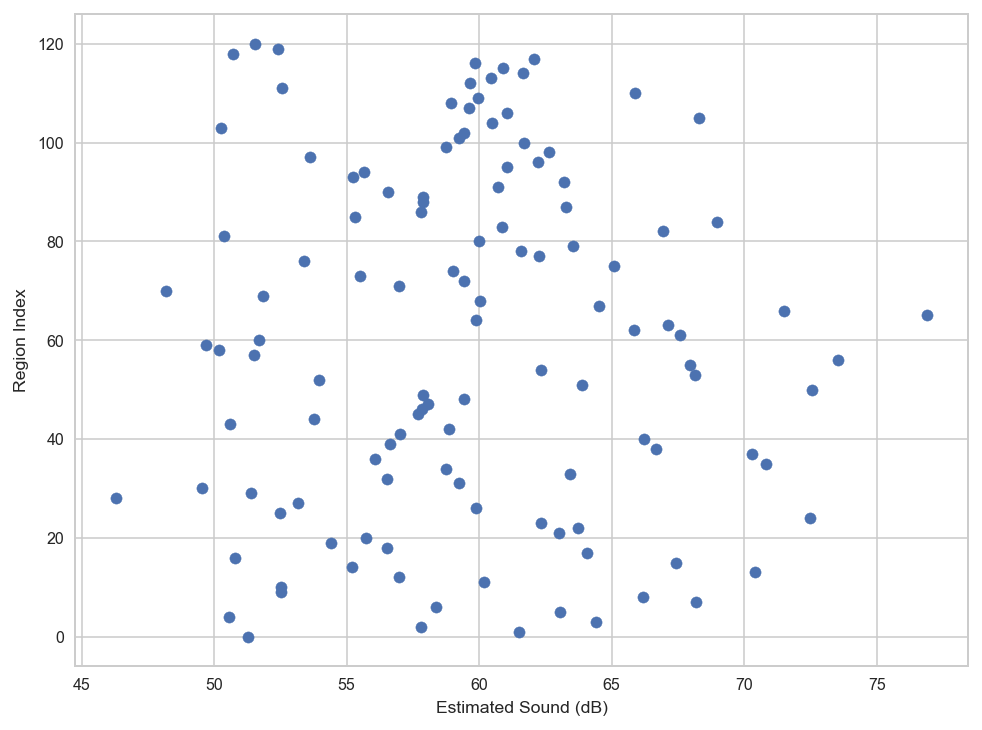

In [98]:
plt.scatter(noise_df['Estimated Sound (dB)'], range(len(noise_df)))
plt.xlabel('Estimated Sound (dB)')
plt.ylabel('Region Index')

Our estimates suggest that the average sound heard by a region does not reach dangerous levels, because hearing loss may occur at 85 dB and above (4).

Since the vast majority of estimated sound levels fall in between 50 and 70, we will group them in groups of from 50 to 70 with intervals of 5. Any others that fall outside these values will be colored as the extremes.

In [90]:
runway_coordinate = [32.733701, -117.192960]
zoom_start = 12

m = folium.Map(location=runway_coordinate, zoom_start=zoom_start, tiles='Stamen Toner')

for c in range(len(sd_shapes)):
    f_color = ''
    if region_noise_levels[c] < 50:
        f_color = '#fef0d9'
    elif region_noise_levels[c] < 55:
        f_color = '#fdd49e'
    elif region_noise_levels[c] < 60:
        f_color = '#fdbb84'
    elif region_noise_levels[c] < 65:
        f_color = '#fc8d59'
    elif region_noise_levels[c] < 70:
        f_color = '#e34a33'
    else:
        f_color = '#b30000'
    region_lines = folium.features.PolygonMarker(locations=sd_shapes[c], color='#111111', fill_color=f_color, weight=2)
    m.add_child(region_lines)

m